In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import *

In [2]:
df = pd.read_excel("diabetes.xlsx")

In [3]:
data = df.values[:,:-1]
label = df.values[:,-1]
data.shape, label.shape

((768, 8), (768,))

In [4]:
set(label)

{0.0, 1.0}

# Kmeans

In [42]:
kmn = KMeans(n_clusters=2)
kmn.fit(data)
predicted_label = kmn.predict(data)
centroids = kmn.cluster_centers_

In [43]:
if(accuracy_score(label , predicted_label) < 0.5):
    predicted_label = [0 if i==1 else 1 for i in predicted_label]

In [7]:
#inertia
print("inertia = " , kmn.inertia_)

#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(label , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(label , predicted_label))

#V-measure
print("v measure = " , v_measure_score(label , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(label , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(data, predicted_label))

inertia =  5142376.455984383
adjusted rand =  0.07438695547529094
homogeneity =  0.026659254297179365
v measure =  0.029548693803825365
accuracy =  0.66015625
silhouette =  0.5687897205830247


In [8]:
centroids

array([[  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ],
       [  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786]])

In [44]:
centroids

array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786],
       [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ]])

In [10]:
pc1 = PCA(n_components=2)
pc1.fit(data)
tr1= pc1.transform(data)

tr1

array([[-75.71465491, -35.95078264],
       [-82.3582676 ,  28.90821322],
       [-74.63064344, -67.90649647],
       ...,
       [ 32.11319827,   3.3766648 ],
       [-80.21449431, -14.18601977],
       [-81.30814972,  21.62149606]])

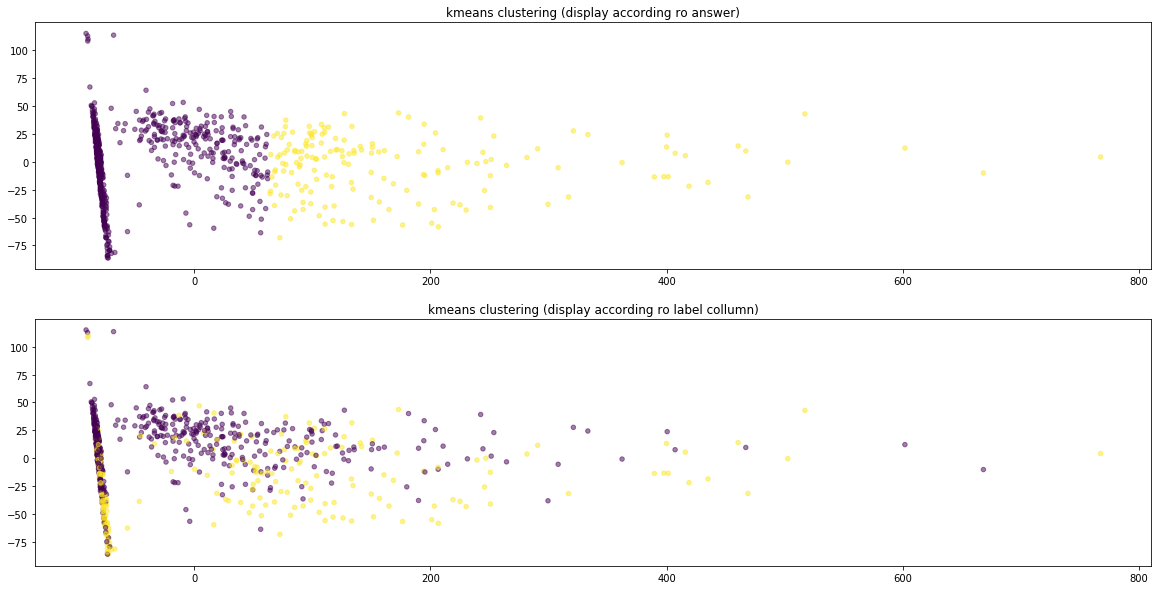

In [11]:
#according to predicted_label
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(tr1[:,0] , tr1[:,1] , c=predicted_label , s = 20 , alpha = 0.5)
plt.title("kmeans clustering (display according ro answer)")

#according to label
plt.subplot(2,1,2)
plt.scatter(tr1[:,0] , tr1[:,1] , c=label, s = 20 , alpha = 0.5)
plt.title("kmeans clustering (display according ro label collumn)")
plt.show()

In [12]:
pc2 = PCA(n_components=3)
pc2.fit(data)
tr2 = pc2.transform(data)

tr2

array([[-75.71465491, -35.95078264,  -7.26078895],
       [-82.3582676 ,  28.90821322,  -5.49667139],
       [-74.63064344, -67.90649647,  19.46180812],
       ...,
       [ 32.11319827,   3.3766648 ,  -1.58786446],
       [-80.21449431, -14.18601977,  12.3512639 ],
       [-81.30814972,  21.62149606,  -8.15276833]])

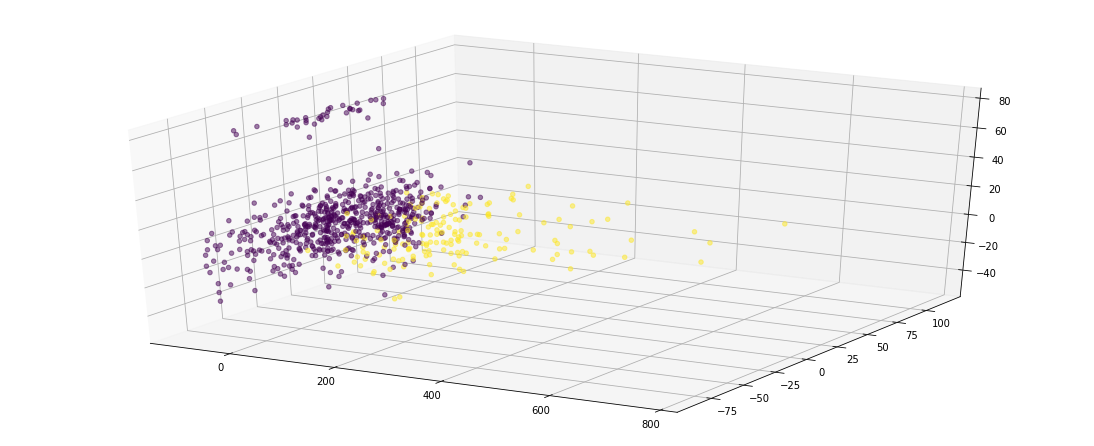

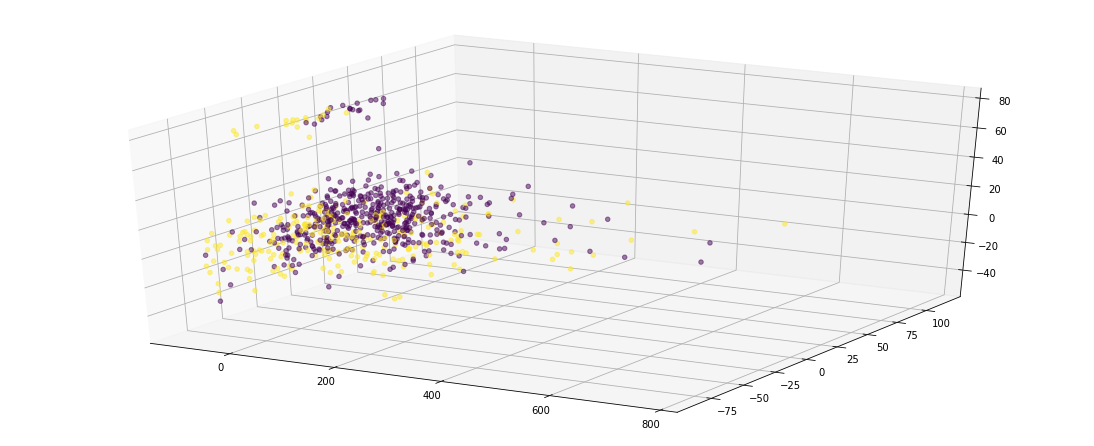

In [13]:
fig1 = plt.figure(figsize=(15,6))
ax = Axes3D(fig1)
ax.scatter(tr2[:,0] , tr2[:,1] , tr2[:,2] , s=20 , c = predicted_label , alpha = 0.5)

fig2 = plt.figure(figsize=(15,6))
ax = Axes3D(fig2)
ax.scatter(tr2[:,0] , tr2[:,1] , tr2[:,2] , s=20 , c = label , alpha = 0.5)

plt.show()

[5142376.455984383, 2913322.58008178, 2151320.938003855, 1737004.1690590864, 1466876.26025959, 1301095.9853839797]


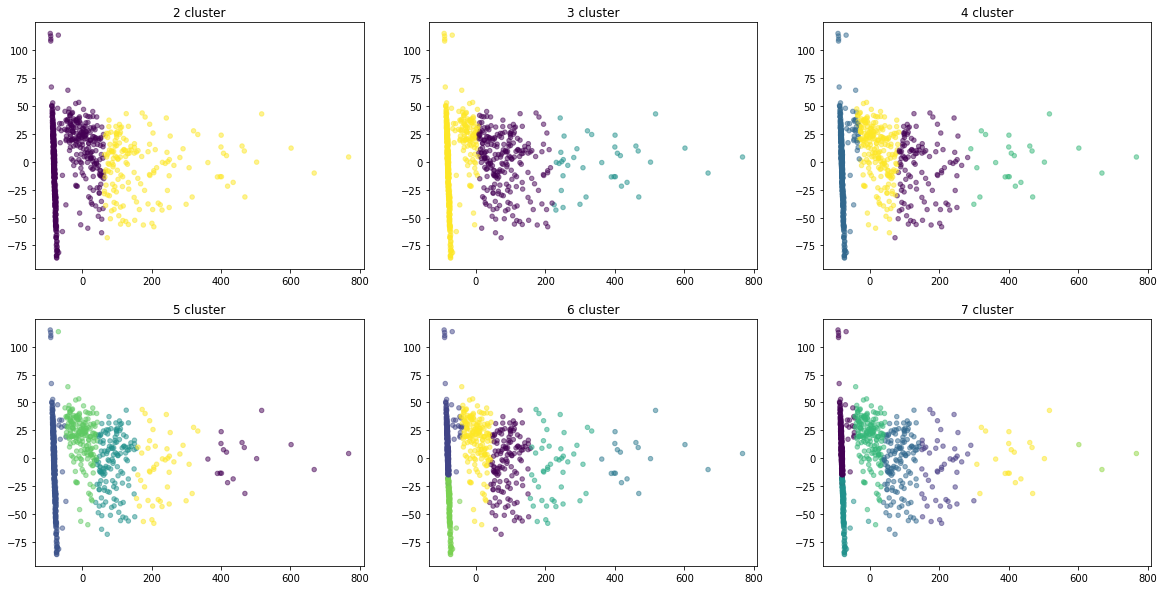

In [14]:
inertia_list = []
adj = []
homo = []
vm = []
acc = []
sil = []

plt.figure(figsize=(20,10))
for i in range(2,8):
    kmn = KMeans(n_clusters=i)
    kmn.fit(data)
    inertia_list.append(kmn.inertia_)
    predicted_label = kmn.predict(data)

    adj.append(adjusted_rand_score(label , predicted_label))

    homo.append(homogeneity_score(label , predicted_label))

    vm.append(v_measure_score(label , predicted_label))

    acc.append(accuracy_score(label , predicted_label))
        
    sil.append(silhouette_score(data, predicted_label))
    
    pc1 = PCA(n_components=2)
    pc1.fit(data)
    tr1= pc1.transform(data)
    
    plt.subplot(2,3,i-1)
    plt.scatter(tr1[:,0] , tr1[:,1] , c=predicted_label , s = 20 , alpha = 0.5)
    plt.title(str(i)+" cluster")
    
print(inertia_list)
plt.show()

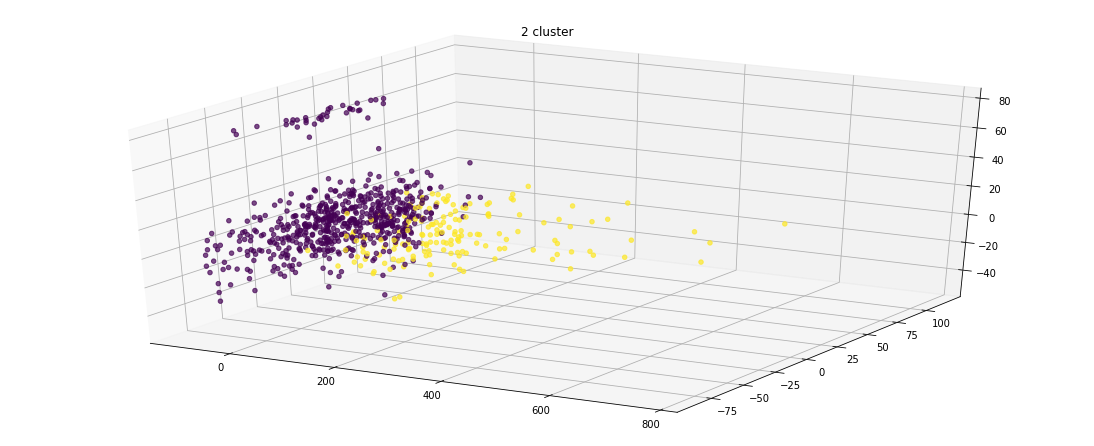

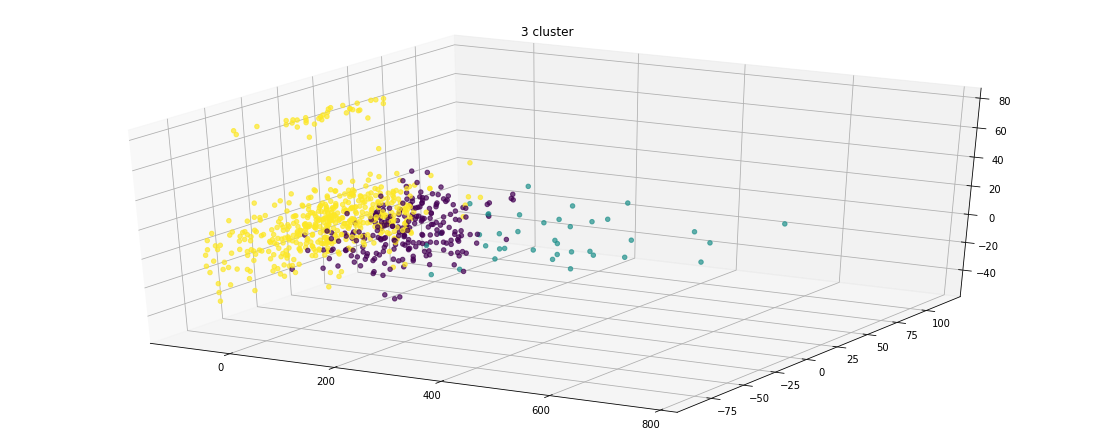

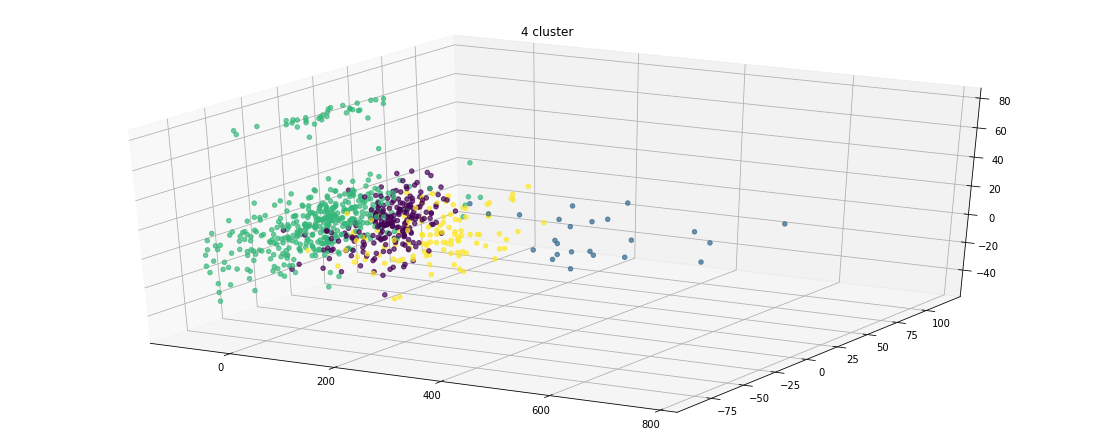

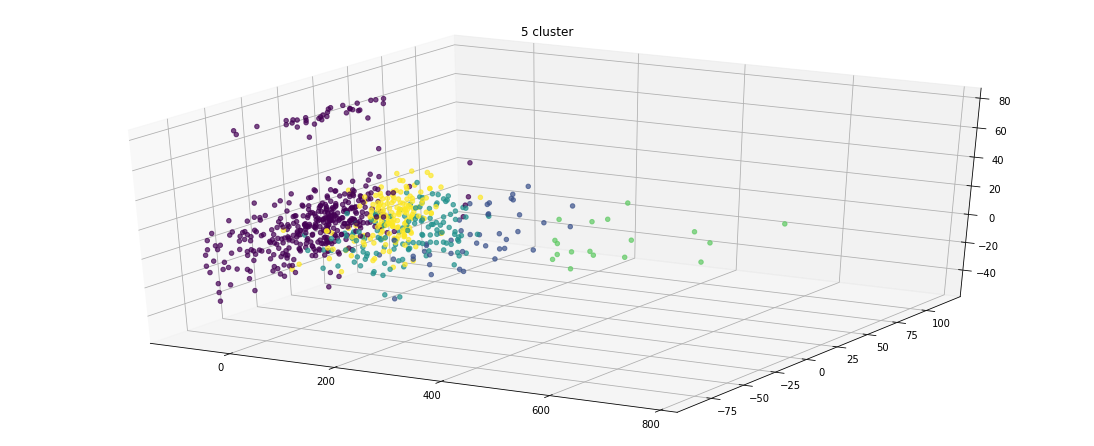

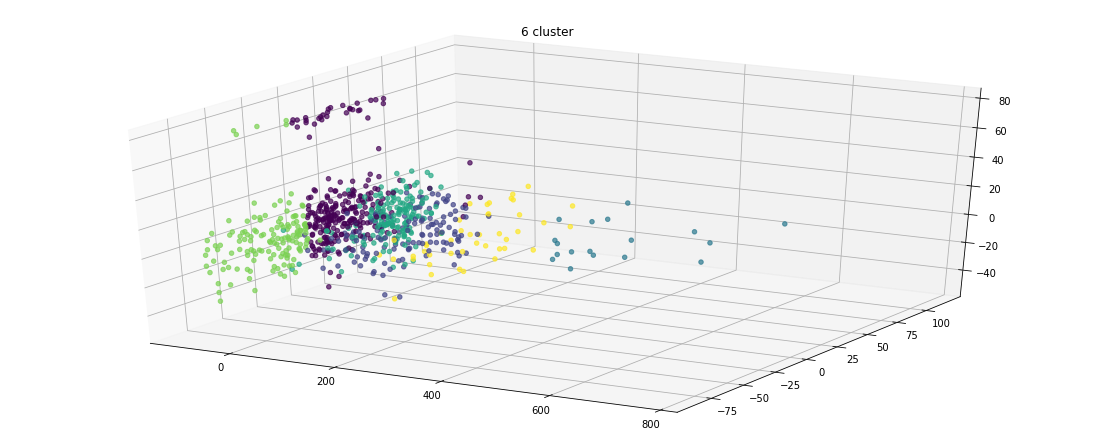

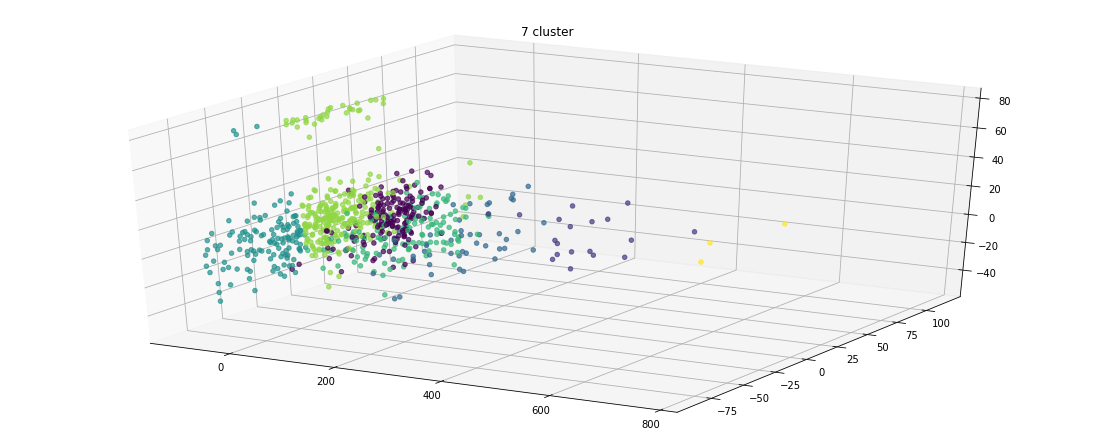

In [15]:
for i in range(2,8):
    kmn = KMeans(n_clusters=i)
    kmn.fit(data)
    predicted_label = kmn.predict(data)
    
    pc2 = PCA(n_components=3)
    pc2.fit(data)
    tr2 = pc2.transform(data)
    
    fig = plt.figure(figsize=(15,6))
    ax = Axes3D(fig)
    ax.scatter(tr2[:,0] , tr2[:,1] , tr2[:,2] , s=20 , c = predicted_label , alpha = 0.7)
    plt.title(str(i)+" cluster")
plt.show()

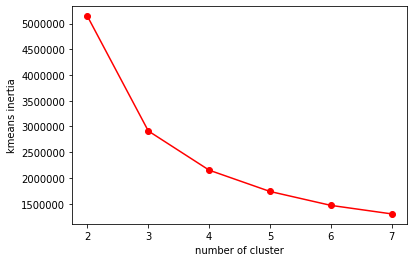

In [16]:
plt.plot(np.arange(2,8) , inertia_list , 'ro-')
plt.xlabel("number of cluster")
plt.ylabel("kmeans inertia")
plt.show()

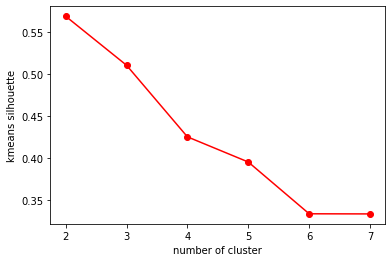

In [17]:
plt.plot(np.arange(2,8) , sil , 'ro-')
plt.xlabel("number of cluster")
plt.ylabel("kmeans silhouette")
plt.show()

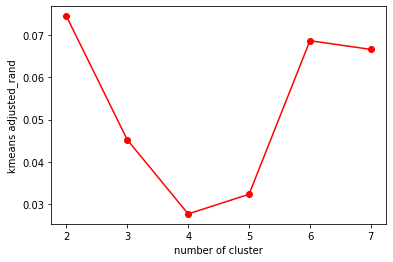

In [18]:
plt.plot(np.arange(2,8) , adj , 'ro-')
plt.xlabel("number of cluster")
plt.ylabel("kmeans adjusted_rand")
plt.show()

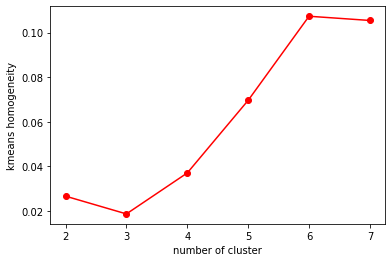

In [19]:
plt.plot(np.arange(2,8) , homo , 'ro-')
plt.xlabel("number of cluster")
plt.ylabel("kmeans homogeneity")
plt.show()

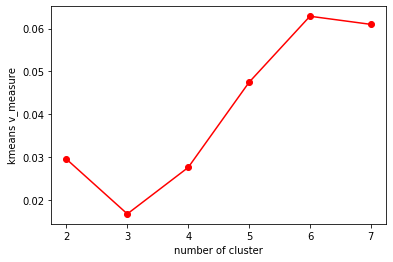

In [20]:
plt.plot(np.arange(2,8) , vm , 'ro-')
plt.xlabel("number of cluster")
plt.ylabel("kmeans v_measure")
plt.show()

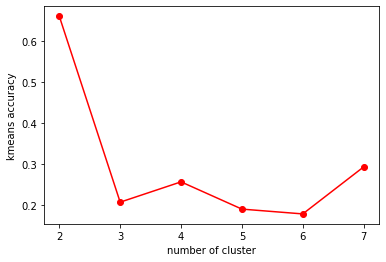

In [21]:
plt.plot(np.arange(2,8) , acc , 'ro-')
plt.xlabel("number of cluster")
plt.ylabel("kmeans accuracy")
plt.show()

# Hierarchical

In [22]:
from sklearn.cluster import AgglomerativeClustering
# اقلیدسی
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
predicted_label = cluster.fit_predict(data)

if(accuracy_score(label , predicted_label) < 0.5):
    predicted_label = [0 if i==1 else 1 for i in predicted_label]
    
#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(label , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(label , predicted_label))

#V-measure
print("v measure = " , v_measure_score(label , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(label , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(data, predicted_label))

adjusted rand =  0.10032827816135324
homogeneity =  0.04233065920802829
v measure =  0.045789235224634864
accuracy =  0.67578125
silhouette =  0.5532678504628996


In [23]:
# منهتن
cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
predicted_label = cluster.fit_predict(data)

if(accuracy_score(label , predicted_label) < 0.5):
    predicted_label = [0 if i==1 else 1 for i in predicted_label]
    
#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(label , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(label , predicted_label))

#V-measure
print("v measure = " , v_measure_score(label , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(label , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(data, predicted_label))

adjusted rand =  0.01955345462434527
homogeneity =  0.007746006514382634
v measure =  0.013220500765539732
accuracy =  0.6588541666666666
silhouette =  0.7285184979407209


In [24]:
# L1
cluster = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='complete')
predicted_label = cluster.fit_predict(data)

if(accuracy_score(label , predicted_label) < 0.5):
    predicted_label = [0 if i==1 else 1 for i in predicted_label]
    
#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(label , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(label , predicted_label))

#V-measure
print("v measure = " , v_measure_score(label , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(label , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(data, predicted_label))

adjusted rand =  0.01955345462434527
homogeneity =  0.007746006514382634
v measure =  0.013220500765539732
accuracy =  0.6588541666666666
silhouette =  0.7285184979407209


In [25]:
# L2
cluster = AgglomerativeClustering(n_clusters=2, affinity='l2', linkage='complete')
predicted_label = cluster.fit_predict(data)

if(accuracy_score(label , predicted_label) < 0.5):
    predicted_label = [0 if i==1 else 1 for i in predicted_label]
    
#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(label , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(label , predicted_label))

#V-measure
print("v measure = " , v_measure_score(label , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(label , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(data, predicted_label))

adjusted rand =  -0.0001809925694879175
homogeneity =  3.2810563904137856e-06
v measure =  6.3126566284050075e-06
accuracy =  0.6497395833333334
silhouette =  0.7859247612980926


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

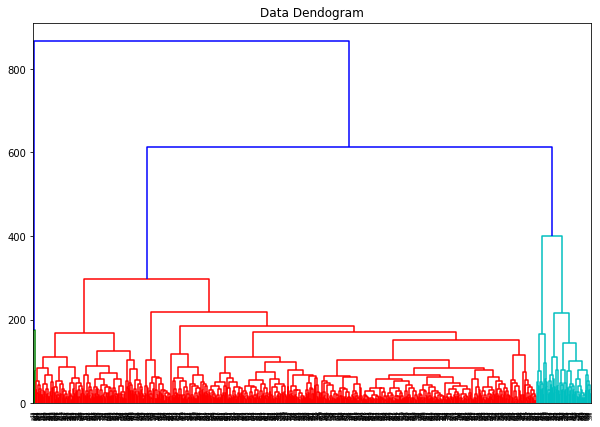

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
plt.title("Data Dendogram")
dend = dendrogram(linkage(data, method='complete', metric='minkowski'))

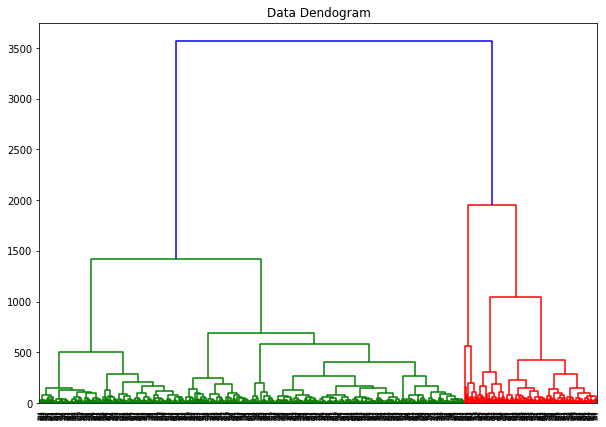

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
plt.title("Data Dendogram")
dend = dendrogram(linkage(data, method='ward', metric='euclidean'))

# Fuzzy

In [29]:
pc1 = PCA(n_components=None)
pc1.fit(data)
tr1= pc1.transform(data)

tr1.shape

(768, 8)

In [30]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

fcm = FCM(n_clusters=2)
predicted_label = fcm.fit(tr1)

# outputs
fcm_centers = fcm.centers
predicted_label  = fcm.u.argmax(axis=1)

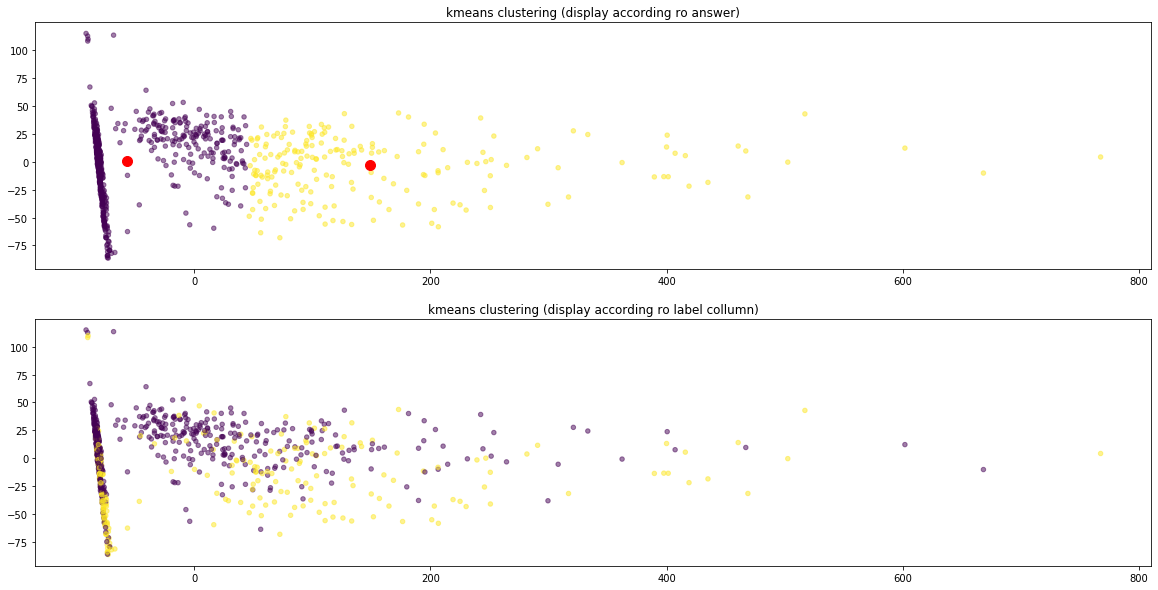

In [31]:
#according to predicted_label
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(tr1[:,0] , tr1[:,1] , c=predicted_label , s = 20 , alpha = 0.5)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], s=100, color='red')
plt.title("kmeans clustering (display according ro answer)")

#according to label
plt.subplot(2,1,2)
plt.scatter(tr1[:,0] , tr1[:,1] , c=label, s = 20 , alpha = 0.5)
plt.title("kmeans clustering (display according ro label collumn)")
plt.show()

In [32]:
#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(label , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(label , predicted_label))

#V-measure
print("v measure = " , v_measure_score(label , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(label , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(data, predicted_label))

adjusted rand =  0.08041638260165113
homogeneity =  0.031683641895698486
v measure =  0.03366245855617135
accuracy =  0.6588541666666666
silhouette =  0.5550533971691713


# particle swarm optimization (PSO)

In [33]:
import pyswarms as ps
df = pd.read_excel("diabetes.xlsx")
X = df.values[:,:-1].astype('float64')
y = df.values[:,-1].astype('int32')
X.shape, y.shape

((768, 8), (768,))

In [34]:
from sklearn import linear_model

kmn = KMeans(n_clusters=2)

def f_per_particle(m, alpha):
    total_features = 8
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    kmn.fit(X_subset)
    p_label = kmn.predict(X_subset)
    P = (p_label == y).mean()
    if(P < 0.5):
        p_label = np.array([0 if i==1 else 1 for i in p_label])
        P = (p_label == y).mean()
    
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

In [35]:
def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [36]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 8
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=100)

2020-05-17 16:30:54,336 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████████████████████████████████████████████████|100/100, best_cost=0.251
2020-05-17 16:33:06,000 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.2511458333333334, best pos: [1 1 0 1 0 1 1 1]


In [37]:
pos

array([1, 1, 0, 1, 0, 1, 1, 1])

In [38]:
X_selected_features = X[:,pos==1]

kmn = KMeans(n_clusters=2)
kmn.fit(X_selected_features)
predicted_label = kmn.predict(X_selected_features)
centroids = kmn.cluster_centers_

if(accuracy_score(y , predicted_label) < 0.5):
    predicted_label = [0 if i==1 else 1 for i in predicted_label]

In [39]:
#inertia
print("inertia = " , kmn.inertia_)

#adjusted rand index
print("adjusted rand = " , adjusted_rand_score(y , predicted_label))

#homogeneity
print("homogeneity = " , homogeneity_score(y , predicted_label))

#V-measure
print("v measure = " , v_measure_score(y , predicted_label))

#accuracy
print("accuracy = " , accuracy_score(y , predicted_label))

#silhouette
print("silhouette = " , silhouette_score(X_selected_features, predicted_label))

inertia =  628116.1138392149
adjusted rand =  0.22520323280933754
homogeneity =  0.13728423417905503
v measure =  0.13898592580890015
accuracy =  0.7421875
silhouette =  0.4022436313096851


In [40]:
pc1 = PCA(n_components=2)
pc1.fit(X_selected_features)
tr1= pc1.transform(X_selected_features)

tr1

array([[-29.37280312,  10.3553733 ],
       [ 35.87579763,   8.4776775 ],
       [-60.21972106, -23.30498759],
       ...,
       [  0.47921699,   1.63637337],
       [ -5.6308231 , -22.6122932 ],
       [ 28.51623466,  12.41914499]])

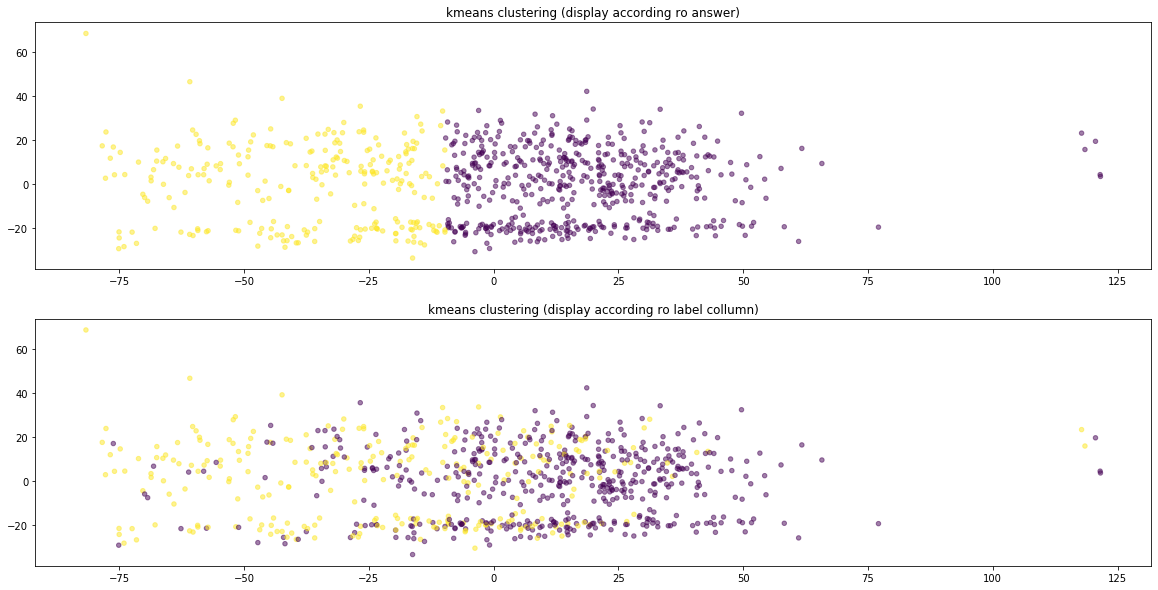

In [41]:
#according to predicted_label
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(tr1[:,0] , tr1[:,1] , c=predicted_label , s = 20 , alpha = 0.5)
plt.title("kmeans clustering (display according ro answer)")

#according to label
plt.subplot(2,1,2)
plt.scatter(tr1[:,0] , tr1[:,1] , c=label, s = 20 , alpha = 0.5)
plt.title("kmeans clustering (display according ro label collumn)")
plt.show()